# Autoencoder with PyTorch and deepadots

ref: https://medium.com/pytorch/implementing-an-autoencoder-in-pytorch-19baa22647d1, https://www.kaggle.com/jagadeeshkotra/autoencoders-with-pytorch

In [1]:
%cd ..

/src


In [2]:
import torch
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

%matplotlib inline

In [3]:
import torch.nn as nn
import torchvision
from torch import optim

In [4]:
from src.models.autoencoder import AutoEncoder, AE

## get dataset and dataloader

In [5]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=True, transform=transform, download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=False, transform=transform, download=True
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=32, shuffle=False, num_workers=4
)

In [6]:
train_set_array = train_dataset.data.numpy()

In [7]:
train_dataset[0][0].shape
n_features = 784

In [8]:
x_train_rs = train_set_array.reshape(train_set_array.shape[0],-1).astype(np.float32)
x_train_rs.shape

(60000, 784)

## Dataset of DeepADots (DF)

In [9]:
import tensorflow as tf
import pandas as pd
from src.datasets.dataset import Dataset
class MNIST(Dataset):
    """0 is the outlier class. The training set is free of outliers."""

    def __init__(self, seed):
        super().__init__(name="MNIST", file_name='')  # We do not need to load data from a file
        self.seed = seed

    def load(self):
        # 0 is the outlier, all other digits are normal
        OUTLIER_CLASS = 0
        mnist = tf.keras.datasets.mnist
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        # Label outliers with 1 and normal digits with 0
        y_train, y_test = (y_train == OUTLIER_CLASS), (y_test == OUTLIER_CLASS)
        x_train = x_train[~y_train]  # Remove outliers from the training set
        x_train, x_test = x_train / 255, x_test / 255
        x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)
        self._data = tuple(pd.DataFrame(data=data) for data in [x_train, y_train, x_test, y_test])


x_train, y_train, x_test, y_test = MNIST(seed=0).data()
# Use fewer instances for demonstration purposes
x_train, y_train = x_train[:1000], y_train[:1000]
x_test, y_test = x_test[:100], y_test[:100]
x_train.shape

(1000, 784)

## use DeepADots

In [10]:
from src.models.autoencoder_deepadots import AutoEncoder

In [11]:
model = AutoEncoder(sequence_length=1, num_epochs=40, hidden_size=10, lr=1e-4, gpu=0)
model.fit(x_train)

# error = model.predict(x_train_rs)
# print(roc_auc_score(y_test, error))  

  0%|          | 0/40 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
100%|██████████| 40/40 [00:09<00:00,  4.05it/s]
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


In [12]:
output = model.predict_val(x_train)

In [13]:
i = 3

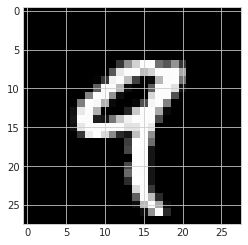

In [14]:
plt.imshow(x_train.values[i].reshape(28, 28), cmap='gray')
plt.show()

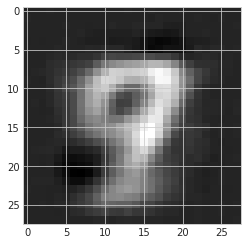

In [15]:
plt.imshow(output[i//20][i%20].reshape(28, 28), cmap='gray')
plt.show()

## check code for deepadots

In [15]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X=x_train.copy()
sequence_length = 1
train_gaussian_percentage = 0.25

In [26]:
X.interpolate(inplace=True)
X.bfill(inplace=True)
data = X.values
sequences = [data[i:i + sequence_length] for i in range(data.shape[0] - sequence_length + 1)]
indices = np.random.permutation(len(sequences))

In [29]:
split_point = int(train_gaussian_percentage * len(sequences))
split_point

250

### use original codes with skorch

In [16]:
from src.wrapper.regressor import AutoEncoderNet
from skorch import NeuralNetRegressor
from src.models.autoencoder import AutoEncoder_sk, AutoEncoderModule

net = AutoEncoderNet(
    AutoEncoder_sk,
    module__n_features=n_features,
    module__hidden_size=10, 
    module__gpu='0',
    lr=1e-4,
    max_epochs=40,
    batch_size=20,
#     criterion=torch.nn.MSELoss,
#     optimizer=torch.optim.Adam,
)

In [17]:
x_train_skorch = x_train.values.astype(np.float32)
net.fit(x_train_skorch, x_train_skorch)

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.1244        0.1239  0.2103
      2        0.1244        0.1238  0.2037
      3        0.1243        0.1238  0.2177
      4        0.1243        0.1238  0.2091
      5        0.1243        0.1237  0.2229
      6        0.1242        0.1237  0.2050
      7        0.1242        0.1237  0.2106
      8        0.1241        0.1236  0.2149
      9        0.1241        0.1236  0.2154
     10        0.1241        0.1236  0.2047
     11        0.1240        0.1235  0.2178
     12        0.1240        0.1235  0.2279
     13        0.1240        0.1235  0.2188
     14        0.1239        0.1234  0.2203
     15        0.1239        0.1234  0.3068
     16        0.1239        0.1233  0.2773
     17        0.1238        0.1233  0.3018
     18        0.1238        0.1233  0.4264
     19        0.1238        0.1232  0.4271
     20        0.1237        0.1232  0.4596
     21        0.1237        0.1

<class 'src.wrapper.regressor.AutoEncoderNet'>[initialized](
  module_=AutoEncoder_sk(
    (encoder): Encoder(
      (_encode): Sequential(
        (0): Linear(in_features=784, out_features=512, bias=True)
        (1): Tanh()
        (2): Linear(in_features=512, out_features=256, bias=True)
        (3): Tanh()
        (4): Linear(in_features=256, out_features=128, bias=True)
        (5): Tanh()
        (6): Linear(in_features=128, out_features=64, bias=True)
        (7): Tanh()
        (8): Linear(in_features=64, out_features=32, bias=True)
        (9): Tanh()
        (10): Linear(in_features=32, out_features=10, bias=True)
      )
    )
    (decoder): Decoder(
      (_decode): Sequential(
        (0): Linear(in_features=10, out_features=32, bias=True)
        (1): Tanh()
        (2): Linear(in_features=32, out_features=64, bias=True)
        (3): Tanh()
        (4): Linear(in_features=64, out_features=128, bias=True)
        (5): Tanh()
        (6): Linear(in_features=128, out_feature

In [18]:
decoded_pred, encoded_pred = net.forward(x_train_skorch)
decoded_pred.shape, encoded_pred.shape

(torch.Size([1000, 784]), torch.Size([1000, 10]))

In [19]:
x_train_skorch_image = x_train_skorch.reshape(x_train_skorch.shape[0], 28, 28)
decoded_pred_image = decoded_pred.reshape(decoded_pred.shape[0], 28, 28)

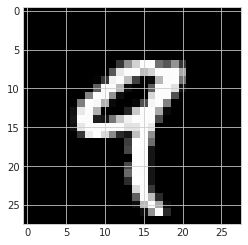

In [20]:
plt.imshow(x_train_skorch_image[i], cmap='gray')
plt.show()

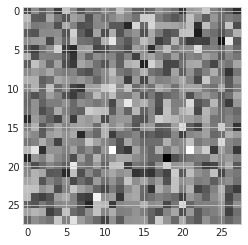

In [21]:
plt.imshow(decoded_pred_image[i], cmap='gray')
plt.show()

In [22]:
# original codeが何かおかしい。

In [25]:
from src.wrapper.regressor import AutoEncoderNet
from skorch import NeuralNetRegressor
from src.models.autoencoder import AutoEncoder_sk, AutoEncoderModule

net = AutoEncoderNet(
    AutoEncoderModule,
    module__n_features=n_features,
    module__hidden_size=10, 
    module__gpu='0',
    module__sequence_length= 30,
    module__seed=None,
    lr=1e-4,
    max_epochs=40,
    batch_size=20,
#     criterion=torch.nn.MSELoss,
#     optimizer=torch.optim.Adam,
)

In [ ]:
##　fitの中身でnetに入れる前に色々やっている。あとsequence_length: int = 30が謎

In [26]:
x_train_skorch = x_train.values.astype(np.float32)
net.fit(x_train_skorch, x_train_skorch)

RuntimeError: size mismatch, m1: [20 x 784], m2: [23520 x 16384] at /pytorch/aten/src/TH/generic/THTensorMath.cpp:41